In [118]:
import pandas as pd
import numpy as np
import math
import json
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, log_loss, f1_score
from sklearn.utils import resample
from sklearn.decomposition import PCA
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import csv
from datetime import date
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

warnings.filterwarnings(action='once')

In [9]:
from sklearn.decomposition import PCA

In [18]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [19]:
df=pd.read_excel('C:/DATA/Test/Standardised data.xlsx')
df.shape

(6889, 228)

In [42]:
df.describe()

,customer_id,daily_net_payment,daily_avg_points_balance,daily_net_trxn_count,Beverages_daily_item_payment_sum,Breakfast_daily_item_payment_sum,Catering_daily_item_payment_sum,Choose_Two_daily_item_payment_s,Deli_Kits_daily_item_payment_sum,Desserts_daily_item_payment_sum,Donations_daily_item_payment_sum,Family_Packs_daily_item_payment_sum,Gift_Cards_daily_item_payment_sum,Kids_Meal_daily_item_payment_sum,Merchandise_daily_item_payment_sum,Modifiers_daily_item_payment_sum,Other_daily_item_payment_sum,Salads_daily_item_payment_sum,Sandwiches_daily_item_payment_sum,Saxton_daily_item_payment_sum,Shareables_daily_item_payment_sum,Sides_daily_item_payment_sum,Soups_daily_item_payment_sum,Spuds_daily_item_payment_sum,Beverages_daily_item_count_sum,Breakfast_daily_item_count_sum,Catering_daily_item_count_sum,Choose_Two_daily_item_count_sum,Deli_Kits_daily_item_count_sum,Desserts_daily_item_count_sum,Donations_daily_item_count_sum,Family_Packs_daily_item_count_sum,Gift_Cards_daily_item_count_sum,Kids_Meal_daily_item_count_sum,Merchandise_daily_item_count_sum,Modifiers_daily_item_count_sum,Other_daily_item_count_sum,Salads_daily_item_count_sum,Sandwiches_daily_item_count_sum,Saxton_daily_item_count_sum,Shareables_daily_item_count_sum,Sides_daily_item_count_sum,Soups_daily_item_count_sum,Spuds_daily_item_count_sum,daily_net_points_spent,daily_net_points_earned,daily_avg_order_value,daily_net_payment_lag1W_sum,daily_net_trxn_count_lag1W_sum,daily_net_points_spent_lag1W_sum,daily_net_points_earned_lag1W_sum,daily_net_payment_lag1M_sum,daily_net_trxn_count_lag1M_sum,daily_net_points_spent_lag1M_sum,daily_net_points_earned_lag1M_sum,daily_net_payment_lag2M_sum,daily_net_trxn_count_lag2M_sum,daily_net_points_spent_lag2M_sum,daily_net_points_earned_lag2M_sum,daily_net_payment_lag3M_sum,daily_net_trxn_count_lag3M_sum,daily_net_points_spent_lag3M_sum,daily_net_points_earned_lag3M_sum,daily_net_payment_lag6M_sum,daily_net_trxn_count_lag6M_sum,daily_net_points_spent_lag6M_sum,daily_net_points_earned_lag6M_sum,daily_net_payment_lag1Y_sum,daily_net_trxn_count_curr_lag1Y_sum,daily_net_points_spent_lag1Y_sum,daily_net_points_earned_lag1Y_sum,daily_net_payment_lifetime_sum,daily_net_trxn_count_lifetime_sum,daily_net_points_spent_lifetime_sum,daily_net_points_earned_lifetime_sum,Beverages_daily_item_payment_sum_lag1M,Breakfast_daily_item_payment_sum_lag1M,Catering_daily_item_payment_sum_lag1M,Choose_Two_daily_item_payment_sum_lag1M,Deli_Kits_daily_item_payment_sum_lag1M,Desserts_daily_item_payment_sum_lag1M,Donations_daily_item_payment_sum_lag1M,Family_Packs_daily_item_payment_sum_lag1M,Gift_Cards_daily_item_payment_sum_lag1M,Kids_Meal_daily_item_payment_sum_lag1M,Merchandise_daily_item_payment_sum_lag1M,Modifiers_daily_item_payment_sum_lag1M,Other_daily_item_payment_sum_lag1M,Salads_daily_item_payment_sum_lag1M,Sandwiches_daily_item_payment_sum_lag1M,Saxton_daily_item_payment_sum_lag1M,Shareables_daily_item_payment_sum_lag1M,Sides_daily_item_payment_sum_lag1M,Soups_daily_item_payment_sum_lag1M,Spuds_daily_item_payment_sum_lag1M,Beverages_payment_sum_lag6M,Breakfast_payment_sum_lag6M,Catering_payment_sum_lag6M,Choose_Two_payment_sum_lag6M,Deli_Kits_payment_sum_lag6M,Desserts_payment_sum_lag6M,Donations_payment_sum_lag6M,Family_Packs_payment_sum_lag6M,Gift_Cards_payment_sum_lag6M,Kids_Meal_payment_sum_lag6M,Merchandise_payment_sum_lag6M,Modifiers_daily__sum_lag6M,Other_payment_sum_lag6M,Salads_payment_sum_lag6M,Sandwiches_payment_sum_lag6M,Saxton_payment_sum_lag6M,shareables_payment_sum_lag6M,Sides_payment_sum_lag6M,Soups_payment_sum_lag6M,Spuds_payment_sum_lag6M,Beverages_payment_sum_lag1Y,Breakfast_payment_sum_lag1Y,Catering_payment_sum_lag1Y,Choose_Two_payment_sum_lag1Y,Deli_Kits_payment_sum_lag1Y,Desserts_payment_sum_lag1Y,Donations_payment_sum_lag1Y,Family_Packs_payment_sum_lag1Y,Gift_Cards_payment_sum_lag1Y,Kids_Meal_payment_sum_lag1Y,Merchandise_payment_lag1Y,Modifiers_payment_sum_lag1Y,Other_payment_sum_lag1Y,Salads_payment_sum_lag1Y,Sandwiches_p

In [6]:
d = dtale.show(df)
d.open_browser()

C:\Users\u14769\AppData\Roaming\Python\Python38\site-packages\dtale\correlations.py:33: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



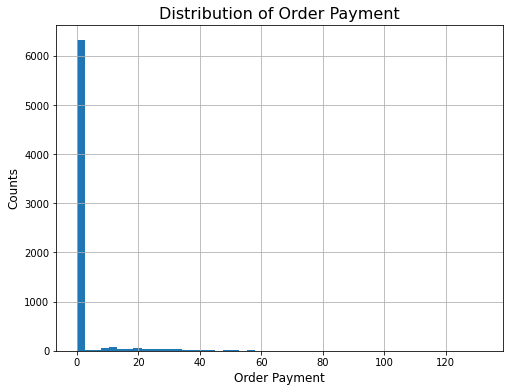

In [21]:
# Order Payment Distribution
fig, ax = plt.subplots(figsize=(8,6));
df['order_payment'].hist(bins=50, ax=ax);
ax.set_title("Distribution of Order Payment", fontsize=16)
ax.set_xlabel("Order Payment", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

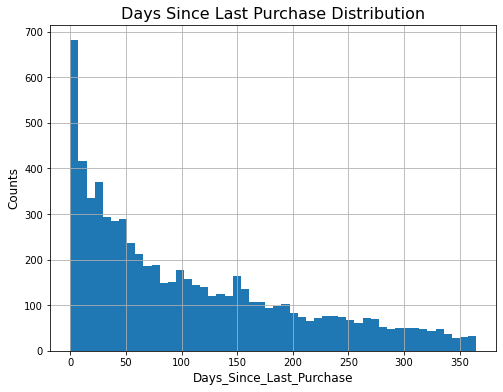

In [9]:
# Days_Since_Last_Purchase Distribution
fig, ax = plt.subplots(figsize=(8,6));
df['Days_Since_Last_Purchase'].hist(bins=50, ax=ax);
ax.set_title("Days Since Last Purchase Distribution", fontsize=16)
ax.set_xlabel("Days_Since_Last_Purchase", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

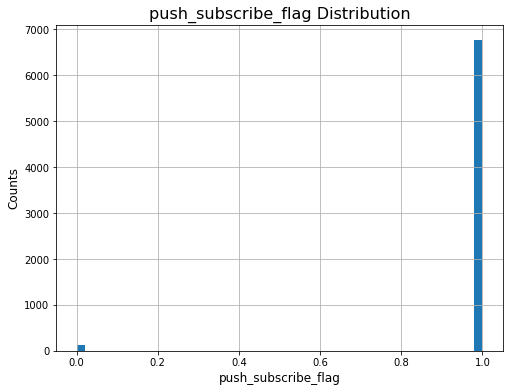

In [11]:
# push_subscribe_flag Distribution
fig, ax = plt.subplots(figsize=(8,6));
df['push_subscribe_flag'].hist(bins=50, ax=ax);
ax.set_title("push_subscribe_flag Distribution", fontsize=16)
ax.set_xlabel("push_subscribe_flag", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

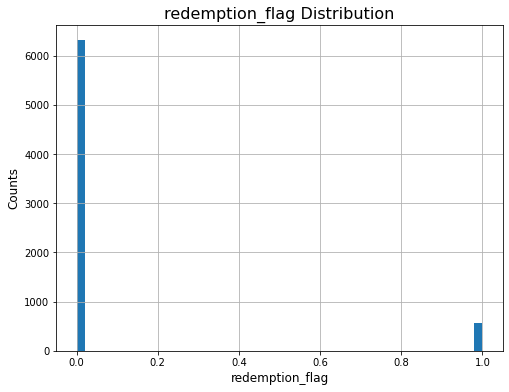

In [13]:
# Redemption Flag Distribution
fig, ax = plt.subplots(figsize=(8,6));
df['redemption_flag'].hist(bins=50, ax=ax);
ax.set_title("redemption_flag Distribution", fontsize=16)
ax.set_xlabel("redemption_flag", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

In [ ]:
daily_avg_order_value

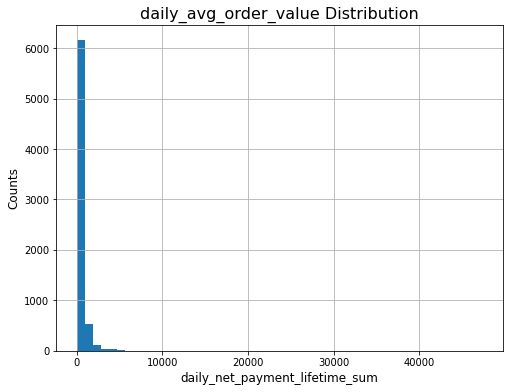

In [15]:
# daily_net_payment_lifetime_sum Distribution
fig, ax = plt.subplots(figsize=(8,6));
df['daily_net_payment_lifetime_sum'].hist(bins=50, ax=ax);
ax.set_title("daily_avg_order_value Distribution", fontsize=16)
ax.set_xlabel("daily_net_payment_lifetime_sum", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

# Data Preprocessing

In [22]:
#Get Redeemed data
Redeemed= df[df['redemption_flag']==1]
Redeemed.drop(['redemption_flag'], axis=1, inplace=True)
Redeemed.shape

<ipython-input-22-fdb0e2f0f2c1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(575, 227)

In [23]:
Redeemed.head()

,date,customer_id,daily_net_payment,daily_avg_points_balance,daily_net_trxn_count,Beverages_daily_item_payment_sum,Breakfast_daily_item_payment_sum,Catering_daily_item_payment_sum,Choose_Two_daily_item_payment_s,Deli_Kits_daily_item_payment_sum,Desserts_daily_item_payment_sum,Donations_daily_item_payment_sum,Family_Packs_daily_item_payment_sum,Gift_Cards_daily_item_payment_sum,Kids_Meal_daily_item_payment_sum,Merchandise_daily_item_payment_sum,Modifiers_daily_item_payment_sum,Other_daily_item_payment_sum,Salads_daily_item_payment_sum,Sandwiches_daily_item_payment_sum,Saxton_daily_item_payment_sum,Shareables_daily_item_payment_sum,Sides_daily_item_payment_sum,Soups_daily_item_payment_sum,Spuds_daily_item_payment_sum,Beverages_daily_item_count_sum,Breakfast_daily_item_count_sum,Catering_daily_item_count_sum,Choose_Two_daily_item_count_sum,Deli_Kits_daily_item_count_sum,Desserts_daily_item_count_sum,Donations_daily_item_count_sum,Family_Packs_daily_item_count_sum,Gift_Cards_daily_item_count_sum,Kids_Meal_daily_item_count_sum,Merchandise_daily_item_count_sum,Modifiers_daily_item_count_sum,Other_daily_item_count_sum,Salads_daily_item_count_sum,Sandwiches_daily_item_count_sum,Saxton_daily_item_count_sum,Shareables_daily_item_count_sum,Sides_daily_item_count_sum,Soups_daily_item_count_sum,Spuds_daily_item_count_sum,daily_net_points_spent,daily_net_points_earned,daily_avg_order_value,daily_net_payment_lag1W_sum,daily_net_trxn_count_lag1W_sum,daily_net_points_spent_lag1W_sum,daily_net_points_earned_lag1W_sum,daily_net_payment_lag1M_sum,daily_net_trxn_count_lag1M_sum,daily_net_points_spent_lag1M_sum,daily_net_points_earned_lag1M_sum,daily_net_payment_lag2M_sum,daily_net_trxn_count_lag2M_sum,daily_net_points_spent_lag2M_sum,daily_net_points_earned_lag2M_sum,daily_net_payment_lag3M_sum,daily_net_trxn_count_lag3M_sum,daily_net_points_spent_lag3M_sum,daily_net_points_earned_lag3M_sum,daily_net_payment_lag6M_sum,daily_net_trxn_count_lag6M_sum,daily_net_points_spent_lag6M_sum,daily_net_points_earned_lag6M_sum,daily_net_payment_lag1Y_sum,daily_net_trxn_count_curr_lag1Y_sum,daily_net_points_spent_lag1Y_sum,daily_net_points_earned_lag1Y_sum,daily_net_payment_lifetime_sum,daily_net_trxn_count_lifetime_sum,daily_net_points_spent_lifetime_sum,daily_net_points_earned_lifetime_sum,Beverages_daily_item_payment_sum_lag1M,Breakfast_daily_item_payment_sum_lag1M,Catering_daily_item_payment_sum_lag1M,Choose_Two_daily_item_payment_sum_lag1M,Deli_Kits_daily_item_payment_sum_lag1M,Desserts_daily_item_payment_sum_lag1M,Donations_daily_item_payment_sum_lag1M,Family_Packs_daily_item_payment_sum_lag1M,Gift_Cards_daily_item_payment_sum_lag1M,Kids_Meal_daily_item_payment_sum_lag1M,Merchandise_daily_item_payment_sum_lag1M,Modifiers_daily_item_payment_sum_lag1M,Other_daily_item_payment_sum_lag1M,Salads_daily_item_payment_sum_lag1M,Sandwiches_daily_item_payment_sum_lag1M,Saxton_daily_item_payment_sum_lag1M,Shareables_daily_item_payment_sum_lag1M,Sides_daily_item_payment_sum_lag1M,Soups_daily_item_payment_sum_lag1M,Spuds_daily_item_payment_sum_lag1M,Beverages_payment_sum_lag6M,Breakfast_payment_sum_lag6M,Catering_payment_sum_lag6M,Choose_Two_payment_sum_lag6M,Deli_Kits_payment_sum_lag6M,Desserts_payment_sum_lag6M,Donations_payment_sum_lag6M,Family_Packs_payment_sum_lag6M,Gift_Cards_payment_sum_lag6M,Kids_Meal_payment_sum_lag6M,Merchandise_payment_sum_lag6M,Modifiers_daily__sum_lag6M,Other_payment_sum_lag6M,Salads_payment_sum_lag6M,Sandwiches_payment_sum_lag6M,Saxton_payment_sum_lag6M,shareables_payment_sum_lag6M,Sides_payment_sum_lag6M,Soups_payment_sum_lag6M,Spuds_payment_sum_lag6M,Beverages_payment_sum_lag1Y,Breakfast_payment_sum_lag1Y,Catering_payment_sum_lag1Y,Choose_Two_payment_sum_lag1Y,Deli_Kits_payment_sum_lag1Y,Desserts_payment_sum_lag1Y,Donations_payment_sum_lag1Y,Family_Packs_payment_sum_lag1Y,Gift_Cards_payment_sum_lag1Y,Kids_Meal_payment_sum_lag1Y,Merchandise_payment_lag1Y,Modifiers_payment_sum_lag1Y,Other_payment_sum_lag1Y,Salads_payment_sum_lag1Y,Sandwic

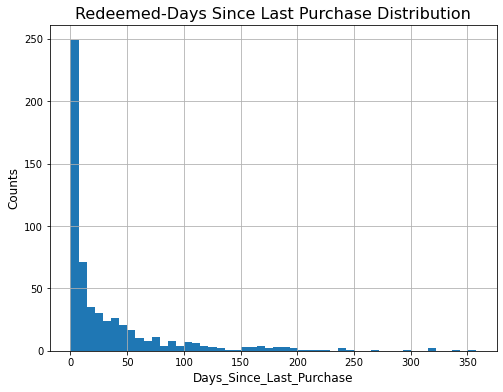

In [24]:
#Non_Redeemed['Days_Since_Last_Purchase'].value_counts()
fig, ax = plt.subplots(figsize=(8,6));
Redeemed['Days_Since_Last_Purchase'].hist(bins=50, ax=ax);
ax.set_title("Redeemed-Days Since Last Purchase Distribution", fontsize=16)
ax.set_xlabel("Days_Since_Last_Purchase", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

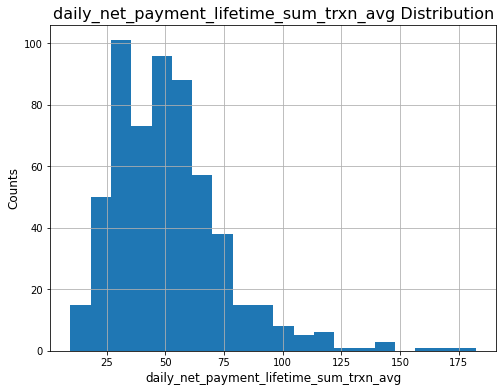

In [85]:
fig, ax = plt.subplots(figsize=(8,6));
Redeemed['daily_net_payment_lifetime_sum_trxn_avg'].hist(bins=20, ax=ax);
ax.set_title("daily_net_payment_lifetime_sum_trxn_avg Distribution", fontsize=16)
ax.set_xlabel("daily_net_payment_lifetime_sum_trxn_avg", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

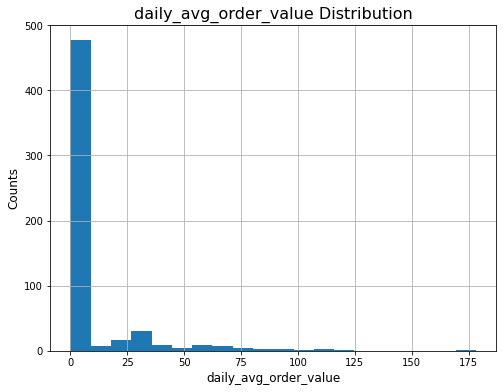

In [44]:
fig, ax = plt.subplots(figsize=(8,6));
Redeemed['daily_avg_order_value'].hist(bins=20, ax=ax);
ax.set_title("daily_avg_order_value Distribution", fontsize=16)
ax.set_xlabel("daily_avg_order_value", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

In [25]:
# Get non-redeemed data
Non_Redeemed= df[df['redemption_flag']==0]
Non_Redeemed.drop(['redemption_flag'], axis=1, inplace=True)
Non_Redeemed.shape

<ipython-input-25-22e5a7728407>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(6314, 227)

In [25]:
Non_Redeemed.head()

,date,customer_id,daily_net_payment,daily_avg_points_balance,daily_net_trxn_count,Beverages_daily_item_payment_sum,Breakfast_daily_item_payment_sum,Catering_daily_item_payment_sum,Choose_Two_daily_item_payment_s,Deli_Kits_daily_item_payment_sum,Desserts_daily_item_payment_sum,Donations_daily_item_payment_sum,Family_Packs_daily_item_payment_sum,Gift_Cards_daily_item_payment_sum,Kids_Meal_daily_item_payment_sum,Merchandise_daily_item_payment_sum,Modifiers_daily_item_payment_sum,Other_daily_item_payment_sum,Salads_daily_item_payment_sum,Sandwiches_daily_item_payment_sum,Saxton_daily_item_payment_sum,Shareables_daily_item_payment_sum,Sides_daily_item_payment_sum,Soups_daily_item_payment_sum,Spuds_daily_item_payment_sum,Beverages_daily_item_count_sum,Breakfast_daily_item_count_sum,Catering_daily_item_count_sum,Choose_Two_daily_item_count_sum,Deli_Kits_daily_item_count_sum,Desserts_daily_item_count_sum,Donations_daily_item_count_sum,Family_Packs_daily_item_count_sum,Gift_Cards_daily_item_count_sum,Kids_Meal_daily_item_count_sum,Merchandise_daily_item_count_sum,Modifiers_daily_item_count_sum,Other_daily_item_count_sum,Salads_daily_item_count_sum,Sandwiches_daily_item_count_sum,Saxton_daily_item_count_sum,Shareables_daily_item_count_sum,Sides_daily_item_count_sum,Soups_daily_item_count_sum,Spuds_daily_item_count_sum,daily_net_points_spent,daily_net_points_earned,daily_avg_order_value,daily_net_payment_lag1W_sum,daily_net_trxn_count_lag1W_sum,daily_net_points_spent_lag1W_sum,daily_net_points_earned_lag1W_sum,daily_net_payment_lag1M_sum,daily_net_trxn_count_lag1M_sum,daily_net_points_spent_lag1M_sum,daily_net_points_earned_lag1M_sum,daily_net_payment_lag2M_sum,daily_net_trxn_count_lag2M_sum,daily_net_points_spent_lag2M_sum,daily_net_points_earned_lag2M_sum,daily_net_payment_lag3M_sum,daily_net_trxn_count_lag3M_sum,daily_net_points_spent_lag3M_sum,daily_net_points_earned_lag3M_sum,daily_net_payment_lag6M_sum,daily_net_trxn_count_lag6M_sum,daily_net_points_spent_lag6M_sum,daily_net_points_earned_lag6M_sum,daily_net_payment_lag1Y_sum,daily_net_trxn_count_curr_lag1Y_sum,daily_net_points_spent_lag1Y_sum,daily_net_points_earned_lag1Y_sum,daily_net_payment_lifetime_sum,daily_net_trxn_count_lifetime_sum,daily_net_points_spent_lifetime_sum,daily_net_points_earned_lifetime_sum,Beverages_daily_item_payment_sum_lag1M,Breakfast_daily_item_payment_sum_lag1M,Catering_daily_item_payment_sum_lag1M,Choose_Two_daily_item_payment_sum_lag1M,Deli_Kits_daily_item_payment_sum_lag1M,Desserts_daily_item_payment_sum_lag1M,Donations_daily_item_payment_sum_lag1M,Family_Packs_daily_item_payment_sum_lag1M,Gift_Cards_daily_item_payment_sum_lag1M,Kids_Meal_daily_item_payment_sum_lag1M,Merchandise_daily_item_payment_sum_lag1M,Modifiers_daily_item_payment_sum_lag1M,Other_daily_item_payment_sum_lag1M,Salads_daily_item_payment_sum_lag1M,Sandwiches_daily_item_payment_sum_lag1M,Saxton_daily_item_payment_sum_lag1M,Shareables_daily_item_payment_sum_lag1M,Sides_daily_item_payment_sum_lag1M,Soups_daily_item_payment_sum_lag1M,Spuds_daily_item_payment_sum_lag1M,Beverages_payment_sum_lag6M,Breakfast_payment_sum_lag6M,Catering_payment_sum_lag6M,Choose_Two_payment_sum_lag6M,Deli_Kits_payment_sum_lag6M,Desserts_payment_sum_lag6M,Donations_payment_sum_lag6M,Family_Packs_payment_sum_lag6M,Gift_Cards_payment_sum_lag6M,Kids_Meal_payment_sum_lag6M,Merchandise_payment_sum_lag6M,Modifiers_daily__sum_lag6M,Other_payment_sum_lag6M,Salads_payment_sum_lag6M,Sandwiches_payment_sum_lag6M,Saxton_payment_sum_lag6M,shareables_payment_sum_lag6M,Sides_payment_sum_lag6M,Soups_payment_sum_lag6M,Spuds_payment_sum_lag6M,Beverages_payment_sum_lag1Y,Breakfast_payment_sum_lag1Y,Catering_payment_sum_lag1Y,Choose_Two_payment_sum_lag1Y,Deli_Kits_payment_sum_lag1Y,Desserts_payment_sum_lag1Y,Donations_payment_sum_lag1Y,Family_Packs_payment_sum_lag1Y,Gift_Cards_payment_sum_lag1Y,Kids_Meal_payment_sum_lag1Y,Merchandise_payment_lag1Y,Modifiers_payment_sum_lag1Y,Other_payment_sum_lag1Y,Salads_payment_sum_lag1Y,Sandwic

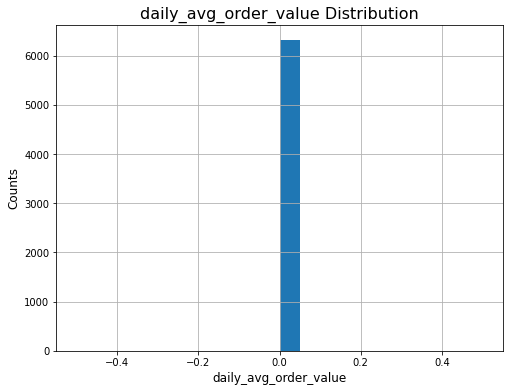

In [43]:
# Find all 
#Non_Redeemed['Days_Since_Last_Purchase'].value_counts()
fig, ax = plt.subplots(figsize=(8,6));
Non_Redeemed['daily_avg_order_value'].hist(bins=20, ax=ax);
ax.set_title("daily_avg_order_value Distribution", fontsize=16)
ax.set_xlabel("daily_avg_order_value", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

In [27]:
Non_Redeemed['cust_last_trxn_date'].value_counts()

2022-07-21    69
2022-06-28    54
2022-06-20    53
2022-06-03    52
2022-06-26    52
2022-07-01    51
2022-06-24    48
2022-07-05    47
2022-05-26    47
2022-05-08    47
2022-05-27    47
2022-07-12    46
2022-07-22    44
2022-07-17    44
2022-06-07    43
2022-06-10    43
2022-05-14    42
2022-06-25    41
2022-06-29    39
2022-06-14    39
2022-06-23    39
2022-05-10    38
2022-03-31    38
2022-06-17    37
2022-07-02    36
2022-06-30    36
2022-05-17    36
2022-06-18    36
2022-07-13    35
2022-05-21    34
2022-05-01    34
2022-04-21    34
2022-03-15    34
2022-04-05    34
2022-06-21    33
2022-07-26    33
2022-05-12    33
2022-05-22    32
2022-03-25    32
2022-07-08    32
2022-07-03    32
2022-05-23    32
2022-06-01    32
2022-04-24    32
2022-07-25    32
2022-06-04    32
2022-05-24    31
2022-07-16    31
2022-07-19    31
2022-06-22    31
2022-06-19    31
2022-03-03    31
2022-04-20    30
2022-06-16    30
2022-07-18    30
2022-04-19    30
2022-06-09    30
2022-07-07    30
2022-05-16    

In [26]:
df['Promotion']=np.where(df['redemption_flag']==1,'Successful','Failed')
df.head()

,date,customer_id,daily_net_payment,daily_avg_points_balance,daily_net_trxn_count,Beverages_daily_item_payment_sum,Breakfast_daily_item_payment_sum,Catering_daily_item_payment_sum,Choose_Two_daily_item_payment_s,Deli_Kits_daily_item_payment_sum,Desserts_daily_item_payment_sum,Donations_daily_item_payment_sum,Family_Packs_daily_item_payment_sum,Gift_Cards_daily_item_payment_sum,Kids_Meal_daily_item_payment_sum,Merchandise_daily_item_payment_sum,Modifiers_daily_item_payment_sum,Other_daily_item_payment_sum,Salads_daily_item_payment_sum,Sandwiches_daily_item_payment_sum,Saxton_daily_item_payment_sum,Shareables_daily_item_payment_sum,Sides_daily_item_payment_sum,Soups_daily_item_payment_sum,Spuds_daily_item_payment_sum,Beverages_daily_item_count_sum,Breakfast_daily_item_count_sum,Catering_daily_item_count_sum,Choose_Two_daily_item_count_sum,Deli_Kits_daily_item_count_sum,Desserts_daily_item_count_sum,Donations_daily_item_count_sum,Family_Packs_daily_item_count_sum,Gift_Cards_daily_item_count_sum,Kids_Meal_daily_item_count_sum,Merchandise_daily_item_count_sum,Modifiers_daily_item_count_sum,Other_daily_item_count_sum,Salads_daily_item_count_sum,Sandwiches_daily_item_count_sum,Saxton_daily_item_count_sum,Shareables_daily_item_count_sum,Sides_daily_item_count_sum,Soups_daily_item_count_sum,Spuds_daily_item_count_sum,daily_net_points_spent,daily_net_points_earned,daily_avg_order_value,daily_net_payment_lag1W_sum,daily_net_trxn_count_lag1W_sum,daily_net_points_spent_lag1W_sum,daily_net_points_earned_lag1W_sum,daily_net_payment_lag1M_sum,daily_net_trxn_count_lag1M_sum,daily_net_points_spent_lag1M_sum,daily_net_points_earned_lag1M_sum,daily_net_payment_lag2M_sum,daily_net_trxn_count_lag2M_sum,daily_net_points_spent_lag2M_sum,daily_net_points_earned_lag2M_sum,daily_net_payment_lag3M_sum,daily_net_trxn_count_lag3M_sum,daily_net_points_spent_lag3M_sum,daily_net_points_earned_lag3M_sum,daily_net_payment_lag6M_sum,daily_net_trxn_count_lag6M_sum,daily_net_points_spent_lag6M_sum,daily_net_points_earned_lag6M_sum,daily_net_payment_lag1Y_sum,daily_net_trxn_count_curr_lag1Y_sum,daily_net_points_spent_lag1Y_sum,daily_net_points_earned_lag1Y_sum,daily_net_payment_lifetime_sum,daily_net_trxn_count_lifetime_sum,daily_net_points_spent_lifetime_sum,daily_net_points_earned_lifetime_sum,Beverages_daily_item_payment_sum_lag1M,Breakfast_daily_item_payment_sum_lag1M,Catering_daily_item_payment_sum_lag1M,Choose_Two_daily_item_payment_sum_lag1M,Deli_Kits_daily_item_payment_sum_lag1M,Desserts_daily_item_payment_sum_lag1M,Donations_daily_item_payment_sum_lag1M,Family_Packs_daily_item_payment_sum_lag1M,Gift_Cards_daily_item_payment_sum_lag1M,Kids_Meal_daily_item_payment_sum_lag1M,Merchandise_daily_item_payment_sum_lag1M,Modifiers_daily_item_payment_sum_lag1M,Other_daily_item_payment_sum_lag1M,Salads_daily_item_payment_sum_lag1M,Sandwiches_daily_item_payment_sum_lag1M,Saxton_daily_item_payment_sum_lag1M,Shareables_daily_item_payment_sum_lag1M,Sides_daily_item_payment_sum_lag1M,Soups_daily_item_payment_sum_lag1M,Spuds_daily_item_payment_sum_lag1M,Beverages_payment_sum_lag6M,Breakfast_payment_sum_lag6M,Catering_payment_sum_lag6M,Choose_Two_payment_sum_lag6M,Deli_Kits_payment_sum_lag6M,Desserts_payment_sum_lag6M,Donations_payment_sum_lag6M,Family_Packs_payment_sum_lag6M,Gift_Cards_payment_sum_lag6M,Kids_Meal_payment_sum_lag6M,Merchandise_payment_sum_lag6M,Modifiers_daily__sum_lag6M,Other_payment_sum_lag6M,Salads_payment_sum_lag6M,Sandwiches_payment_sum_lag6M,Saxton_payment_sum_lag6M,shareables_payment_sum_lag6M,Sides_payment_sum_lag6M,Soups_payment_sum_lag6M,Spuds_payment_sum_lag6M,Beverages_payment_sum_lag1Y,Breakfast_payment_sum_lag1Y,Catering_payment_sum_lag1Y,Choose_Two_payment_sum_lag1Y,Deli_Kits_payment_sum_lag1Y,Desserts_payment_sum_lag1Y,Donations_payment_sum_lag1Y,Family_Packs_payment_sum_lag1Y,Gift_Cards_payment_sum_lag1Y,Kids_Meal_payment_sum_lag1Y,Merchandise_payment_lag1Y,Modifiers_payment_sum_lag1Y,Other_payment_sum_lag1Y,Salads_payment_sum_lag1Y,Sandwic

In [27]:
df['Promotion'].value_counts()

Failed        6314
Successful     575
Name: Promotion, dtype: int64

In [70]:
df.isnull().mean()

C:\Users\u14769\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



date                                           0.000000
customer_id                                    0.000000
daily_net_payment                              0.000000
daily_avg_points_balance                       0.026129
daily_net_trxn_count                           0.000000
Beverages_daily_item_payment_sum               0.000000
Breakfast_daily_item_payment_sum               0.000000
Catering_daily_item_payment_sum                0.000000
Choose_Two_daily_item_payment_s                0.000000
Deli_Kits_daily_item_payment_sum               0.000000
Desserts_daily_item_payment_sum                0.000000
Donations_daily_item_payment_sum               0.000000
Family_Packs_daily_item_payment_sum            0.000000
Gift_Cards_daily_item_payment_sum              0.000000
Kids_Meal_daily_item_payment_sum               0.000000
Merchandise_daily_item_payment_sum             0.000000
Modifiers_daily_item_payment_sum               0.000000
Other_daily_item_payment_sum                   0

In [28]:
all_data=df.copy()
all_data.shape

(6889, 229)

In [29]:
# one-hot encode gender
cat_var_to_enc = ['email_subscribe_flag','push_subscribe_flag','sms_subscribe_flag','saxton_flag','holiday_flag','redemption_flag']

for var in cat_var_to_enc:
    all_data = pd.concat([all_data,\
                          pd.get_dummies(all_data[var],\
                                         prefix=var, prefix_sep='_', drop_first=False)], axis=1)
all_data.head()

,date,customer_id,daily_net_payment,daily_avg_points_balance,daily_net_trxn_count,Beverages_daily_item_payment_sum,Breakfast_daily_item_payment_sum,Catering_daily_item_payment_sum,Choose_Two_daily_item_payment_s,Deli_Kits_daily_item_payment_sum,Desserts_daily_item_payment_sum,Donations_daily_item_payment_sum,Family_Packs_daily_item_payment_sum,Gift_Cards_daily_item_payment_sum,Kids_Meal_daily_item_payment_sum,Merchandise_daily_item_payment_sum,Modifiers_daily_item_payment_sum,Other_daily_item_payment_sum,Salads_daily_item_payment_sum,Sandwiches_daily_item_payment_sum,Saxton_daily_item_payment_sum,Shareables_daily_item_payment_sum,Sides_daily_item_payment_sum,Soups_daily_item_payment_sum,Spuds_daily_item_payment_sum,Beverages_daily_item_count_sum,Breakfast_daily_item_count_sum,Catering_daily_item_count_sum,Choose_Two_daily_item_count_sum,Deli_Kits_daily_item_count_sum,Desserts_daily_item_count_sum,Donations_daily_item_count_sum,Family_Packs_daily_item_count_sum,Gift_Cards_daily_item_count_sum,Kids_Meal_daily_item_count_sum,Merchandise_daily_item_count_sum,Modifiers_daily_item_count_sum,Other_daily_item_count_sum,Salads_daily_item_count_sum,Sandwiches_daily_item_count_sum,Saxton_daily_item_count_sum,Shareables_daily_item_count_sum,Sides_daily_item_count_sum,Soups_daily_item_count_sum,Spuds_daily_item_count_sum,daily_net_points_spent,daily_net_points_earned,daily_avg_order_value,daily_net_payment_lag1W_sum,daily_net_trxn_count_lag1W_sum,daily_net_points_spent_lag1W_sum,daily_net_points_earned_lag1W_sum,daily_net_payment_lag1M_sum,daily_net_trxn_count_lag1M_sum,daily_net_points_spent_lag1M_sum,daily_net_points_earned_lag1M_sum,daily_net_payment_lag2M_sum,daily_net_trxn_count_lag2M_sum,daily_net_points_spent_lag2M_sum,daily_net_points_earned_lag2M_sum,daily_net_payment_lag3M_sum,daily_net_trxn_count_lag3M_sum,daily_net_points_spent_lag3M_sum,daily_net_points_earned_lag3M_sum,daily_net_payment_lag6M_sum,daily_net_trxn_count_lag6M_sum,daily_net_points_spent_lag6M_sum,daily_net_points_earned_lag6M_sum,daily_net_payment_lag1Y_sum,daily_net_trxn_count_curr_lag1Y_sum,daily_net_points_spent_lag1Y_sum,daily_net_points_earned_lag1Y_sum,daily_net_payment_lifetime_sum,daily_net_trxn_count_lifetime_sum,daily_net_points_spent_lifetime_sum,daily_net_points_earned_lifetime_sum,Beverages_daily_item_payment_sum_lag1M,Breakfast_daily_item_payment_sum_lag1M,Catering_daily_item_payment_sum_lag1M,Choose_Two_daily_item_payment_sum_lag1M,Deli_Kits_daily_item_payment_sum_lag1M,Desserts_daily_item_payment_sum_lag1M,Donations_daily_item_payment_sum_lag1M,Family_Packs_daily_item_payment_sum_lag1M,Gift_Cards_daily_item_payment_sum_lag1M,Kids_Meal_daily_item_payment_sum_lag1M,Merchandise_daily_item_payment_sum_lag1M,Modifiers_daily_item_payment_sum_lag1M,Other_daily_item_payment_sum_lag1M,Salads_daily_item_payment_sum_lag1M,Sandwiches_daily_item_payment_sum_lag1M,Saxton_daily_item_payment_sum_lag1M,Shareables_daily_item_payment_sum_lag1M,Sides_daily_item_payment_sum_lag1M,Soups_daily_item_payment_sum_lag1M,Spuds_daily_item_payment_sum_lag1M,Beverages_payment_sum_lag6M,Breakfast_payment_sum_lag6M,Catering_payment_sum_lag6M,Choose_Two_payment_sum_lag6M,Deli_Kits_payment_sum_lag6M,Desserts_payment_sum_lag6M,Donations_payment_sum_lag6M,Family_Packs_payment_sum_lag6M,Gift_Cards_payment_sum_lag6M,Kids_Meal_payment_sum_lag6M,Merchandise_payment_sum_lag6M,Modifiers_daily__sum_lag6M,Other_payment_sum_lag6M,Salads_payment_sum_lag6M,Sandwiches_payment_sum_lag6M,Saxton_payment_sum_lag6M,shareables_payment_sum_lag6M,Sides_payment_sum_lag6M,Soups_payment_sum_lag6M,Spuds_payment_sum_lag6M,Beverages_payment_sum_lag1Y,Breakfast_payment_sum_lag1Y,Catering_payment_sum_lag1Y,Choose_Two_payment_sum_lag1Y,Deli_Kits_payment_sum_lag1Y,Desserts_payment_sum_lag1Y,Donations_payment_sum_lag1Y,Family_Packs_payment_sum_lag1Y,Gift_Cards_payment_sum_lag1Y,Kids_Meal_payment_sum_lag1Y,Merchandise_payment_lag1Y,Modifiers_payment_sum_lag1Y,Other_payment_sum_lag1Y,Salads_payment_sum_lag1Y,Sandwic

In [30]:
all_data.shape

(6889, 242)

In [46]:
all_data['daily_avg_points_balance'] = df['daily_avg_points_balance'].fillna(0)

In [47]:
import datetime
data_model =all_data[(all_data['date']<'8/24/2022')]

data_predict = all_data[all_data['date']>'8/24/2022']

data_predict.shape

(294, 242)

In [48]:
data_model.shape

(6294, 242)

In [49]:
#train, valid_test = train_test_split(data_model, test_size=0.2,random_state=42)
#valid, test = train_test_split(valid_test, test_size=0.5,random_state=42)

train, test = train_test_split(data_model, test_size=0.2, random_state=42)

In [50]:
train.head()

,date,customer_id,daily_net_payment,daily_avg_points_balance,daily_net_trxn_count,Beverages_daily_item_payment_sum,Breakfast_daily_item_payment_sum,Catering_daily_item_payment_sum,Choose_Two_daily_item_payment_s,Deli_Kits_daily_item_payment_sum,Desserts_daily_item_payment_sum,Donations_daily_item_payment_sum,Family_Packs_daily_item_payment_sum,Gift_Cards_daily_item_payment_sum,Kids_Meal_daily_item_payment_sum,Merchandise_daily_item_payment_sum,Modifiers_daily_item_payment_sum,Other_daily_item_payment_sum,Salads_daily_item_payment_sum,Sandwiches_daily_item_payment_sum,Saxton_daily_item_payment_sum,Shareables_daily_item_payment_sum,Sides_daily_item_payment_sum,Soups_daily_item_payment_sum,Spuds_daily_item_payment_sum,Beverages_daily_item_count_sum,Breakfast_daily_item_count_sum,Catering_daily_item_count_sum,Choose_Two_daily_item_count_sum,Deli_Kits_daily_item_count_sum,Desserts_daily_item_count_sum,Donations_daily_item_count_sum,Family_Packs_daily_item_count_sum,Gift_Cards_daily_item_count_sum,Kids_Meal_daily_item_count_sum,Merchandise_daily_item_count_sum,Modifiers_daily_item_count_sum,Other_daily_item_count_sum,Salads_daily_item_count_sum,Sandwiches_daily_item_count_sum,Saxton_daily_item_count_sum,Shareables_daily_item_count_sum,Sides_daily_item_count_sum,Soups_daily_item_count_sum,Spuds_daily_item_count_sum,daily_net_points_spent,daily_net_points_earned,daily_avg_order_value,daily_net_payment_lag1W_sum,daily_net_trxn_count_lag1W_sum,daily_net_points_spent_lag1W_sum,daily_net_points_earned_lag1W_sum,daily_net_payment_lag1M_sum,daily_net_trxn_count_lag1M_sum,daily_net_points_spent_lag1M_sum,daily_net_points_earned_lag1M_sum,daily_net_payment_lag2M_sum,daily_net_trxn_count_lag2M_sum,daily_net_points_spent_lag2M_sum,daily_net_points_earned_lag2M_sum,daily_net_payment_lag3M_sum,daily_net_trxn_count_lag3M_sum,daily_net_points_spent_lag3M_sum,daily_net_points_earned_lag3M_sum,daily_net_payment_lag6M_sum,daily_net_trxn_count_lag6M_sum,daily_net_points_spent_lag6M_sum,daily_net_points_earned_lag6M_sum,daily_net_payment_lag1Y_sum,daily_net_trxn_count_curr_lag1Y_sum,daily_net_points_spent_lag1Y_sum,daily_net_points_earned_lag1Y_sum,daily_net_payment_lifetime_sum,daily_net_trxn_count_lifetime_sum,daily_net_points_spent_lifetime_sum,daily_net_points_earned_lifetime_sum,Beverages_daily_item_payment_sum_lag1M,Breakfast_daily_item_payment_sum_lag1M,Catering_daily_item_payment_sum_lag1M,Choose_Two_daily_item_payment_sum_lag1M,Deli_Kits_daily_item_payment_sum_lag1M,Desserts_daily_item_payment_sum_lag1M,Donations_daily_item_payment_sum_lag1M,Family_Packs_daily_item_payment_sum_lag1M,Gift_Cards_daily_item_payment_sum_lag1M,Kids_Meal_daily_item_payment_sum_lag1M,Merchandise_daily_item_payment_sum_lag1M,Modifiers_daily_item_payment_sum_lag1M,Other_daily_item_payment_sum_lag1M,Salads_daily_item_payment_sum_lag1M,Sandwiches_daily_item_payment_sum_lag1M,Saxton_daily_item_payment_sum_lag1M,Shareables_daily_item_payment_sum_lag1M,Sides_daily_item_payment_sum_lag1M,Soups_daily_item_payment_sum_lag1M,Spuds_daily_item_payment_sum_lag1M,Beverages_payment_sum_lag6M,Breakfast_payment_sum_lag6M,Catering_payment_sum_lag6M,Choose_Two_payment_sum_lag6M,Deli_Kits_payment_sum_lag6M,Desserts_payment_sum_lag6M,Donations_payment_sum_lag6M,Family_Packs_payment_sum_lag6M,Gift_Cards_payment_sum_lag6M,Kids_Meal_payment_sum_lag6M,Merchandise_payment_sum_lag6M,Modifiers_daily__sum_lag6M,Other_payment_sum_lag6M,Salads_payment_sum_lag6M,Sandwiches_payment_sum_lag6M,Saxton_payment_sum_lag6M,shareables_payment_sum_lag6M,Sides_payment_sum_lag6M,Soups_payment_sum_lag6M,Spuds_payment_sum_lag6M,Beverages_payment_sum_lag1Y,Breakfast_payment_sum_lag1Y,Catering_payment_sum_lag1Y,Choose_Two_payment_sum_lag1Y,Deli_Kits_payment_sum_lag1Y,Desserts_payment_sum_lag1Y,Donations_payment_sum_lag1Y,Family_Packs_payment_sum_lag1Y,Gift_Cards_payment_sum_lag1Y,Kids_Meal_payment_sum_lag1Y,Merchandise_payment_lag1Y,Modifiers_payment_sum_lag1Y,Other_payment_sum_lag1Y,Salads_payment_sum_lag1Y,Sandwic

In [100]:
X_train = train.drop(columns=['customer_id', 'Promotion','date','WeekStartDate','cust_last_trxn_date','spend_require_flag','spend_required','order_payment'])
X_test = test.drop(columns=['customer_id', 'Promotion','date','WeekStartDate','cust_last_trxn_date','spend_require_flag','spend_required','order_payment'])

In [101]:
# Apply feature scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train))
X_train_scaled.columns = X_train.columns
X_train_scaled.index = X_train.index

X_test_scaled = pd.DataFrame(ss.transform(X_test))
X_test_scaled.columns = X_test.columns
X_test_scaled.index = X_test.index

In [53]:
X_train_scaled.describe()

,daily_net_payment,daily_avg_points_balance,daily_net_trxn_count,Beverages_daily_item_payment_sum,Breakfast_daily_item_payment_sum,Catering_daily_item_payment_sum,Choose_Two_daily_item_payment_s,Deli_Kits_daily_item_payment_sum,Desserts_daily_item_payment_sum,Donations_daily_item_payment_sum,Family_Packs_daily_item_payment_sum,Gift_Cards_daily_item_payment_sum,Kids_Meal_daily_item_payment_sum,Merchandise_daily_item_payment_sum,Modifiers_daily_item_payment_sum,Other_daily_item_payment_sum,Salads_daily_item_payment_sum,Sandwiches_daily_item_payment_sum,Saxton_daily_item_payment_sum,Shareables_daily_item_payment_sum,Sides_daily_item_payment_sum,Soups_daily_item_payment_sum,Spuds_daily_item_payment_sum,Beverages_daily_item_count_sum,Breakfast_daily_item_count_sum,Catering_daily_item_count_sum,Choose_Two_daily_item_count_sum,Deli_Kits_daily_item_count_sum,Desserts_daily_item_count_sum,Donations_daily_item_count_sum,Family_Packs_daily_item_count_sum,Gift_Cards_daily_item_count_sum,Kids_Meal_daily_item_count_sum,Merchandise_daily_item_count_sum,Modifiers_daily_item_count_sum,Other_daily_item_count_sum,Salads_daily_item_count_sum,Sandwiches_daily_item_count_sum,Saxton_daily_item_count_sum,Shareables_daily_item_count_sum,Sides_daily_item_count_sum,Soups_daily_item_count_sum,Spuds_daily_item_count_sum,daily_net_points_spent,daily_net_points_earned,daily_avg_order_value,daily_net_payment_lag1W_sum,daily_net_trxn_count_lag1W_sum,daily_net_points_spent_lag1W_sum,daily_net_points_earned_lag1W_sum,daily_net_payment_lag1M_sum,daily_net_trxn_count_lag1M_sum,daily_net_points_spent_lag1M_sum,daily_net_points_earned_lag1M_sum,daily_net_payment_lag2M_sum,daily_net_trxn_count_lag2M_sum,daily_net_points_spent_lag2M_sum,daily_net_points_earned_lag2M_sum,daily_net_payment_lag3M_sum,daily_net_trxn_count_lag3M_sum,daily_net_points_spent_lag3M_sum,daily_net_points_earned_lag3M_sum,daily_net_payment_lag6M_sum,daily_net_trxn_count_lag6M_sum,daily_net_points_spent_lag6M_sum,daily_net_points_earned_lag6M_sum,daily_net_payment_lag1Y_sum,daily_net_trxn_count_curr_lag1Y_sum,daily_net_points_spent_lag1Y_sum,daily_net_points_earned_lag1Y_sum,daily_net_payment_lifetime_sum,daily_net_trxn_count_lifetime_sum,daily_net_points_spent_lifetime_sum,daily_net_points_earned_lifetime_sum,Beverages_daily_item_payment_sum_lag1M,Breakfast_daily_item_payment_sum_lag1M,Catering_daily_item_payment_sum_lag1M,Choose_Two_daily_item_payment_sum_lag1M,Deli_Kits_daily_item_payment_sum_lag1M,Desserts_daily_item_payment_sum_lag1M,Donations_daily_item_payment_sum_lag1M,Family_Packs_daily_item_payment_sum_lag1M,Gift_Cards_daily_item_payment_sum_lag1M,Kids_Meal_daily_item_payment_sum_lag1M,Merchandise_daily_item_payment_sum_lag1M,Modifiers_daily_item_payment_sum_lag1M,Other_daily_item_payment_sum_lag1M,Salads_daily_item_payment_sum_lag1M,Sandwiches_daily_item_payment_sum_lag1M,Saxton_daily_item_payment_sum_lag1M,Shareables_daily_item_payment_sum_lag1M,Sides_daily_item_payment_sum_lag1M,Soups_daily_item_payment_sum_lag1M,Spuds_daily_item_payment_sum_lag1M,Beverages_payment_sum_lag6M,Breakfast_payment_sum_lag6M,Catering_payment_sum_lag6M,Choose_Two_payment_sum_lag6M,Deli_Kits_payment_sum_lag6M,Desserts_payment_sum_lag6M,Donations_payment_sum_lag6M,Family_Packs_payment_sum_lag6M,Gift_Cards_payment_sum_lag6M,Kids_Meal_payment_sum_lag6M,Merchandise_payment_sum_lag6M,Modifiers_daily__sum_lag6M,Other_payment_sum_lag6M,Salads_payment_sum_lag6M,Sandwiches_payment_sum_lag6M,Saxton_payment_sum_lag6M,shareables_payment_sum_lag6M,Sides_payment_sum_lag6M,Soups_payment_sum_lag6M,Spuds_payment_sum_lag6M,Beverages_payment_sum_lag1Y,Breakfast_payment_sum_lag1Y,Catering_payment_sum_lag1Y,Choose_Two_payment_sum_lag1Y,Deli_Kits_payment_sum_lag1Y,Desserts_payment_sum_lag1Y,Donations_payment_sum_lag1Y,Family_Packs_payment_sum_lag1Y,Gift_Cards_payment_sum_lag1Y,Kids_Meal_payment_sum_lag1Y,Merchandise_payment_lag1Y,Modifiers_payment_sum_lag1Y,Other_payment_sum_lag1Y,Salads_payment_sum_lag1Y,Sandwiches_payment_sum_l

In [102]:
X_train.dtypes

daily_net_payment                              float64
daily_avg_points_balance                       float64
daily_net_trxn_count                             int64
Beverages_daily_item_payment_sum               float64
Breakfast_daily_item_payment_sum                 int64
Catering_daily_item_payment_sum                  int64
Choose_Two_daily_item_payment_s                  int64
Deli_Kits_daily_item_payment_sum                 int64
Desserts_daily_item_payment_sum                float64
Donations_daily_item_payment_sum                 int64
Family_Packs_daily_item_payment_sum              int64
Gift_Cards_daily_item_payment_sum                int64
Kids_Meal_daily_item_payment_sum               float64
Merchandise_daily_item_payment_sum               int64
Modifiers_daily_item_payment_sum                 int64
Other_daily_item_payment_sum                     int64
Salads_daily_item_payment_sum                  float64
Sandwiches_daily_item_payment_sum              float64
Saxton_dai

In [103]:
def do_pca(data, n_components):
  
    pca = PCA(n_components)
    X_pca = pd.DataFrame(pca.fit_transform(data))
    if n_components != None:
        X_pca.columns = ["pca_comp_" + str(i) for i in range(n_components)]
    X_pca.index = data.index
    
    return pca, X_pca

def scree_plot(pca, n_comp=None):

    if n_comp == None: 
        num_components = len(pca.explained_variance_ratio_) 
    elif n_comp < len(pca.explained_variance_ratio_):
        num_components = n_comp
    else: 
       
        num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    values = pca.explained_variance_ratio_
    
    values = values[:num_components]
    
    plt.figure(figsize=(10,6))
    ax = plt.subplot(111)
    # Create array of cumulative variance explained for each n^th component
    cumulative_values = np.cumsum(values)
    # Plot bar chart of variance explained vs each component
    ax.bar(indices, values, color='tab:red')
    # Plot line chart of cumulative variance explained vs number of components
    ax.plot(indices, cumulative_values)
    
   
    if num_components <= 20:
        for i in range(num_components):
            ax.annotate(r"%s%%" % ((str(values[i]*100)[:4])),\
                        (indices[i]+0.2, values[i]), va="bottom",\
                        ha="center", fontsize=12)
        
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
    
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

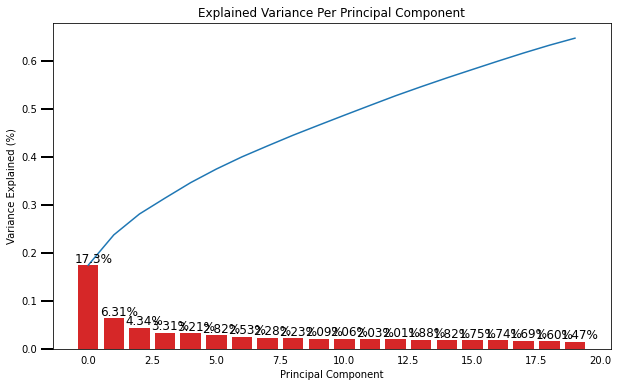

In [104]:

n_components_=20
pca, X_train_pca= do_pca(X_train_scaled,n_components_)
scree_plot(pca)

In [105]:
X_train_pca.head()

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,pca_comp_10,pca_comp_11,pca_comp_12,pca_comp_13,pca_comp_14,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19
3652,-0.026280,0.445931,-0.715585,-1.762422,2.348782,-0.722046,-0.310258,-0.207484,-0.510523,1.268387,1.023445,-0.774201,-0.767064,0.872322,-0.624546,0.789266,0.891497,0.891831,-1.752385,0.615563
6245,1.779827,-3.526331,-2.066913,0.434992,-2.701967,0.227511,0.042702,0.657219,-1.308348,0.153883,0.559887,-1.168703,-0.748222,0.816529,0.461184,-0.722131,-0.561272,0.154958,2.289385,-0.896099
565,-1.914992,1.069514,0.260835,1.543934,-0.312507,-0.023113,-0.202331,-0.017573,0.342386,1.387405,0.459851,1.584242,-0.803840,-0.734153,-0.176905,-0.474769,-0.073571,-1.068841,0.314939,-0.155831
2114,-1.365369,0.826895,0.326331,-2.308245,1.329292,0.171724,-0.129507,0.548717,-0.694777,0.241789,0.582424,-1.029001,-0.727441,0.548154,-0.295789,0.200468,0.876196,0.749767,-0.796816,0.683805
307,-0.183697,0.222121,-0.650306,1.618705,-0.527707,-0.031458,-0.453781,0.881322,-0.975838,-0.710616,2.145098,-1.293949,-0.365180,-0.061823,-0.634934,0.871830,-0.130789,0.865645,0.380447,0.028593


In [106]:
pca

PCA(n_components=20)

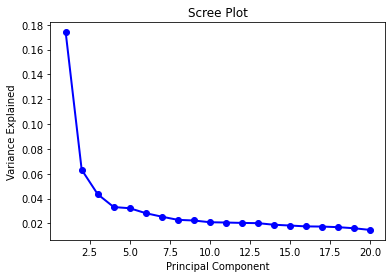

In [107]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [108]:
print(pca.explained_variance_ratio_)

[0.17394559 0.06317917 0.04346516 0.03314178 0.03218746 0.0282038
 0.0253865  0.02284038 0.02231142 0.02091547 0.02066764 0.02036672
 0.02016558 0.01889285 0.01825639 0.01756031 0.01741634 0.01694267
 0.01605911 0.01472066]


In [ ]:
#The first principal component explains 17.4% of the total variation in the dataset.

In [109]:
# transform test
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))
X_test_pca.columns = ["pca_comp_" + str(i) for i in range(n_components_)]
X_test_pca.index = X_test_scaled.index

In [111]:
#Redeemed flag
Y_train = train['redemption_flag']

Y_test = test['redemption_flag']

In [112]:
Y_train.value_counts()

0    4585
1     450
Name: redemption_flag, dtype: int64

In [113]:
X_train_pca.head()

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,pca_comp_10,pca_comp_11,pca_comp_12,pca_comp_13,pca_comp_14,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19
3652,-0.026280,0.445931,-0.715585,-1.762422,2.348782,-0.722046,-0.310258,-0.207484,-0.510523,1.268387,1.023445,-0.774201,-0.767064,0.872322,-0.624546,0.789266,0.891497,0.891831,-1.752385,0.615563
6245,1.779827,-3.526331,-2.066913,0.434992,-2.701967,0.227511,0.042702,0.657219,-1.308348,0.153883,0.559887,-1.168703,-0.748222,0.816529,0.461184,-0.722131,-0.561272,0.154958,2.289385,-0.896099
565,-1.914992,1.069514,0.260835,1.543934,-0.312507,-0.023113,-0.202331,-0.017573,0.342386,1.387405,0.459851,1.584242,-0.803840,-0.734153,-0.176905,-0.474769,-0.073571,-1.068841,0.314939,-0.155831
2114,-1.365369,0.826895,0.326331,-2.308245,1.329292,0.171724,-0.129507,0.548717,-0.694777,0.241789,0.582424,-1.029001,-0.727441,0.548154,-0.295789,0.200468,0.876196,0.749767,-0.796816,0.683805
307,-0.183697,0.222121,-0.650306,1.618705,-0.527707,-0.031458,-0.453781,0.881322,-0.975838,-0.710616,2.145098,-1.293949,-0.365180,-0.061823,-0.634934,0.871830,-0.130789,0.865645,0.380447,0.028593


In [89]:
model_order_payment = GridSearchCV(xgb_income, param_grid=params,\
                            scoring='neg_mean_squared_error', n_jobs=4,\
                            cv=skf.split(X_train_pca,Y_train),\
                            verbose=2)

model_order_payment.fit(X_train_pca, Y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[02:24:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[02:24:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000016619310E40>,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0.1, gpu_id=None,
                                    grow_policy=None, importance_type=Non...
                                    objective='reg:linear', predictor=None, ...),
             n_jobs=4,
             param_grid={'max_depth': [7, 8],
                         'min_child_weight': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 3

In [114]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

params = {
    'max_depth': [7,8],\
    'min_child_weight': np.arange(10,510,10),\
    'n_estimators': [100,150]
}

xgb_gender = xgb.XGBClassifier(learning_rate = 0.1,\
                               objective = 'multi:softmax',\
                               seed = 42,\
                               gamma = 0.1,\
                               num_class = 3,\
                               silent = True)

In [115]:
model_redeemed = GridSearchCV(xgb_gender, param_grid=params,\
                            scoring='f1_micro', n_jobs=4,\
                            cv=skf.split(X_train_pca,Y_train),\
                            verbose=2)

model_redeemed.fit(X_train_pca, Y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[03:00:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000016619630DD0>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.1, gpu_id=None,
                                     grow_policy=None, importance_type=No...
                                     num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             n_jobs=4,
             param_grid={'max_depth': [7, 8],
                         'min_child_weight': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 20

In [116]:

test_pred = model_redeemed .predict(X_test_pca)

test_f1 = f1_score(Y_test, test_pred, average='micro')
print(test_f1)

0.9849086576648133


In [45]:
X_train_scaled.isnull().any()

daily_net_payment                              False
daily_avg_points_balance                        True
daily_net_trxn_count                           False
Beverages_daily_item_payment_sum               False
Breakfast_daily_item_payment_sum               False
Catering_daily_item_payment_sum                False
Choose_Two_daily_item_payment_s                False
Deli_Kits_daily_item_payment_sum               False
Desserts_daily_item_payment_sum                False
Donations_daily_item_payment_sum               False
Family_Packs_daily_item_payment_sum            False
Gift_Cards_daily_item_payment_sum              False
Kids_Meal_daily_item_payment_sum               False
Merchandise_daily_item_payment_sum             False
Modifiers_daily_item_payment_sum               False
Other_daily_item_payment_sum                   False
Salads_daily_item_payment_sum                  False
Sandwiches_daily_item_payment_sum              False
Saxton_daily_item_payment_sum                 